In [1]:
import pandas as pd
import seaborn as sbn

In [2]:
df = pd.read_csv('../data/RAW_recipes.csv')#, index_col='id'

In [3]:
df.count()

name              231636
id                231637
minutes           231637
contributor_id    231637
submitted         231637
tags              231637
nutrition         231637
n_steps           231637
steps             231637
description       226658
ingredients       231637
n_ingredients     231637
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [5]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [6]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


In [7]:
ingredients_df = df[["id", "ingredients"]]
ingredients_df.head()

,id,ingredients
0,137739,"['winter squash', 'mexican seasoning', 'mixed ..."
1,31490,"['prepared pizza crust', 'sausage patty', 'egg..."
2,112140,"['ground beef', 'yellow onions', 'diced tomato..."
3,59389,"['spreadable cheese with garlic and herbs', 'n..."
4,44061,"['tomato juice', 'apple cider vinegar', 'sugar..."


In [8]:
from ast import literal_eval
# Convert to list so explode works
ingredients_df["ingredients"] = ingredients_df["ingredients"].apply(literal_eval)

ingredients_df = ingredients_df.explode("ingredients", ignore_index=True)
ingredients_df.head()

/tmp/ipykernel_619/3679028598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingredients_df["ingredients"] = ingredients_df["ingredients"].apply(literal_eval)


,id,ingredients
0,137739,winter squash
1,137739,mexican seasoning
2,137739,mixed spice
3,137739,honey
4,137739,butter


In [9]:
unique_ingredients = pd.unique(ingredients_df["ingredients"])
len(unique_ingredients)

14942

In [10]:
ingredient_counts = ingredients_df.groupby("ingredients").count()
ingredient_counts.describe()

,id
count,14942.000000
mean,140.314683
std,1341.349585
min,1.000000
25%,2.000000
50%,5.000000
75%,28.000000
max,85746.000000


In [11]:
ingredient_counts.sort_values("id", ascending=False)[:25]

,id
ingredients,
salt,85746
butter,54975
sugar,44535
onion,39065
water,34914
eggs,33761
olive oil,32822
flour,26266
milk,25786


In [12]:
ingredient_counts.sort_values("id", ascending=False)[-25:]

,id
ingredients,
low-fat double cream,1
low-fat cream of potato soup,1
low-fat pizza sauce,1
low-fat saltine crackers,1
low-sodium italian salad dressing,1
low-fat white cheddar cheese,1
low-sodium hot sauce,1
low-sodium cheddar cheese,1
low-sodium bouillon cube,1


/root/.cache/pypoetry/virtualenvs/recipe-finder-VsnhxLU2-py3.9/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

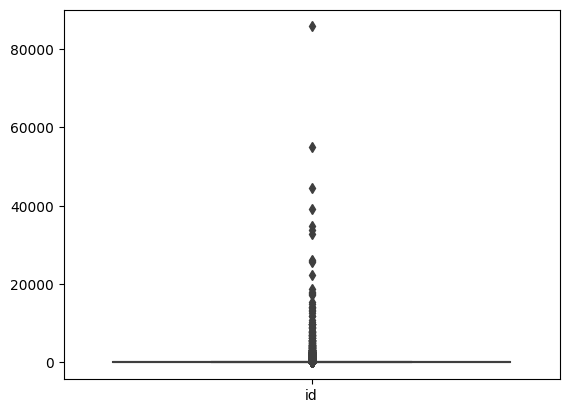

In [13]:
sbn.boxplot(ingredient_counts)

In [14]:
ingredient_counts[ingredient_counts.index.str.contains("pepper")].sort_values("id", ascending=False)[:50]

,id
ingredients,
pepper,22319
salt and pepper,15415
black pepper,13098
fresh ground black pepper,7160
cayenne pepper,6285
red bell pepper,4450
green pepper,4301
ground black pepper,3936
green bell pepper,3287


In [15]:
ingredient_counts[ingredient_counts.index.str.contains("salt")].sort_values("id", ascending=False)[:50]

,id
ingredients,
salt,85746
salt and pepper,15415
unsalted butter,8935
kosher salt,5583
sea salt,3138
salt & freshly ground black pepper,3123
garlic salt,2636
seasoning salt,2261
salt & pepper,2156


In [16]:
ingredient_counts[ingredient_counts.index.str.contains("salt")].sort_values("id", ascending=False)[:50]

,id
ingredients,
salt,85746
salt and pepper,15415
unsalted butter,8935
kosher salt,5583
sea salt,3138
salt & freshly ground black pepper,3123
garlic salt,2636
seasoning salt,2261
salt & pepper,2156


In [34]:
items = ['green pepper', 'black beans', 'cheddar cheese', 'salmon']

In [35]:
matching_items = ingredients_df[ingredients_df["ingredients"].isin(items)].groupby("id").count().sort_values("ingredients", ascending=False)

In [36]:
matching_items.head()

,ingredients
id,
105280,3
250676,3
240689,3
141940,3
115196,3


In [22]:
joined_df = df.join(matching_items, on='id', lsuffix='_left', how='inner')

In [24]:
joined_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients_left,n_ingredients,ingredients
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,1
26,fool the meat eaters chili,54272,40,40525,2003-02-17,"['60-minutes-or-less', 'time-to-make', 'course...","[295.6, 3.0, 56.0, 76.0, 32.0, 1.0, 18.0]",9,"['rehydrate tvp if needed', 'spray or oil a la...",this recipe was adapted by my mother and mysel...,"['vegetarian ground beef', 'garlic', 'onion', ...",12,1
29,george s at the cove black bean soup,44123,90,35193,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[804.7, 108.0, 26.0, 19.0, 28.0, 214.0, 10.0]",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,1
31,global gourmet taco casserole,59952,55,28604,2003-04-16,"['60-minutes-or-less', 'time-to-make', 'course...","[456.8, 40.0, 34.0, 67.0, 57.0, 51.0, 9.0]",11,"['heat oven to 375 degrees', 'brown ground bee...",hey! i found this in a cookbook that recognize...,"['ground beef', 'onion', 'tomato sauce', 'taco...",12,1
46,italian gut busters,35173,45,22724,2002-07-27,"['60-minutes-or-less', 'time-to-make', 'course...","[816.9, 100.0, 11.0, 97.0, 98.0, 180.0, 2.0]",7,['lay out sandwich rolls on jelly roll pans / ...,my sister-in-law made these for us at a family...,"['sandwich bun', 'good seasonings italian sala...",9,1
